# Artificial Intelligence I: Introduction to Data Science and Machine Learning
# Chapter 3: Introduction to Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6)) for all plots
plt.rcParams['figure.figsize'] = [8, 6]
# plt.grid('on') for all plots
plt.rcParams['axes.grid'] = True

# For reproducibility of same results
np.random.seed(1234)

### Data matrices in machine learning
##### (**NOTE:** this is the most common format for machine learning. However, it can change according to learning task, data and learning paradigm)

$$ \\ $$

$$
X_{m,n} = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{m,1} & x_{m,2} & \cdots & x_{m,n} 
 \end{pmatrix}
 %
 ,
 Y_{m} = 
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots  \\
  y_{m} 
 \end{pmatrix}
$$

$$ \\ $$

* $X$ features matrix
* $Y$ targets vector (or matrix for multilabel datasets)
    * NOTE: targets vector might not always available (unsupervised learning)
* $m$ is number of samples (n_samples)
* $n$ is number of features (n_features)
* Targets are only available in supervised learning (labels from dataset)
* Sometimes features can be called independent variables
* And targets can be called dependent variables

### Linear Regression 
* Predicting a continuous value (Ex: house prices) with a linear model
* Assume we only have single column of features and targets
* Shape of features are (n_samples, 1) and target is (n_samples,)
### Generate synthetic linear regression data with noise
* $y_{train} = x_{train} + \epsilon$
* where $\epsilon \sim \mathcal{N}(\mu,\,\sigma^{2})$

In [2]:
dataset_size = 100

# Generate noise to add some variation to the data
mu = 0
sigma = 0.1
epsilon = mu + sigma*np.random.randn(dataset_size)

# Target data (training dataset)
x = np.linspace(-1, 1, dataset_size) 
y = x + epsilon

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

x.shape: (100,)
y.shape: (100,)


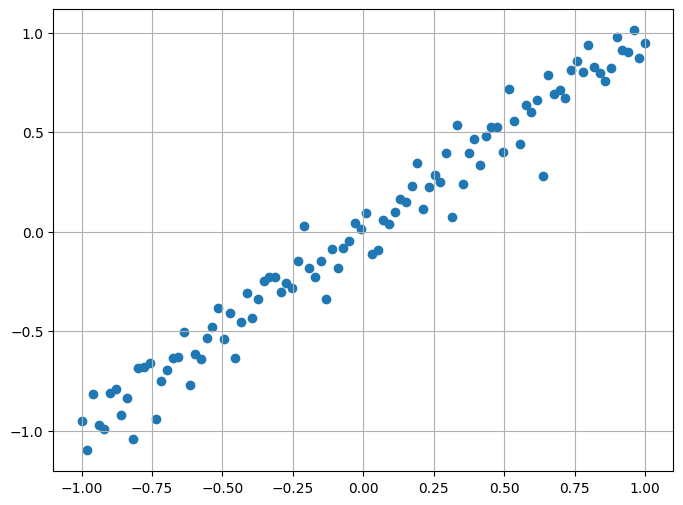

In [3]:
# Plot the generated data
plt.grid('on')
plt.scatter(x, y)

### Basic Linear Model ### 
* $x$ is the input (features)
* $y$ is the prediction (targets)
* **$w_1$ and $w_0$ are parameters we would like to learn**
* $w_1$ is called coefficient (or slope)
* $w_0$ is called intercept (or bias)

$$ 
\large y = w_0 + w_1x
$$

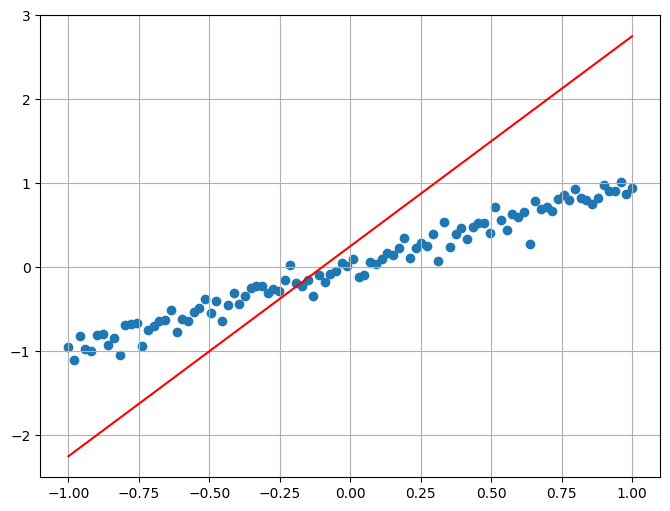

In [4]:
w0 = 0.25

w1 = 2.5

# y = w0 + w1x
y_pred = w1 * x + w0

plt.grid('on')
plt.scatter(x, y)

# Plot linear regression line on the top of data
plt.plot(x, y_pred, c='r')

## How to determine the best fit ? Loss (Cost) functions!
### Mean squarred error

$$
MSE =  \frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y_i})^2
$$

* $N$ is number of samples (n_samples)
* $y_i$ is the targets values (from dataset)
* $\hat{y_i}$ is the predicted values (from model)

In [5]:
# Calculate the mean squarred error between target and predicted
def mse(y_pred, y_target):
    return np.mean((y_pred - y_target)**2)

calculated_mse = mse(y_pred, y)
print(f'Mean sqaured error is: {calculated_mse:.4f}')

Mean sqaured error is: 0.8393


# Linear Regression with Gradient Descent
### Generate data with function:
* $y_{train} = 2 \ x_{train} + 5 + \epsilon$
* where $\epsilon \sim \mathcal{N}(\mu,\,\sigma^{2})$

In [6]:
dataset_size = 1000
x = np.linspace(-1, 1, dataset_size) 

# Generate noise to add some variation to the data
mu = 0
sigma = 0.1
epsilon = mu + sigma*np.random.randn(dataset_size)

y = 2*x + 5 + epsilon

In [7]:
x.shape, y.shape

((1000,), (1000,))

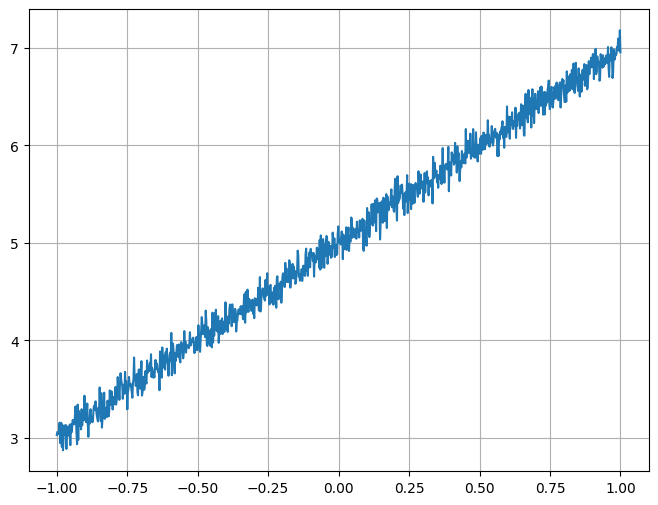

In [8]:
plt.tight_layout()
plt.plot(x, y)

### Model trainable parameters (randomly initialized)

In [9]:
w0 = np.random.randn()
w1 = np.random.randn()
w0, w1

(1.5713959841642924, -1.4059070723881977)

### Loss function

In [10]:
def mse(y_pred, y_target):
    return np.mean(np.square(y_pred - y_target))

### Training Loop
* Two stages: forward & backward pass
* Forward passes: Model makes predictions and loss is calculated
* Parameter update (backward pass): gradients are computed and trainable parameters are updated

In [11]:
# Hyper parameters
num_epochs = 300
learning_rate = 0.02

history = []

for e in range(num_epochs):
    # forward
    y_hat = w0 + w1*x
    
    error = mse(y_hat, y)
    
    if e % 20 == 0:
        print(f'Epoch: {e}, error: {error:.4f}')
    
    # This is for animation
    if e % 10 == 0:
        history.append((w0, w1, error))
    
    # parameter update (backward)
    w0_grad = 2*np.mean(y_hat-y)
    w1_grad = 2*np.mean((y_hat-y)*x)

    w0 -= learning_rate * w0_grad
    w1 -= learning_rate * w1_grad

Epoch: 0, error: 15.6145
Epoch: 20, error: 4.5559
Epoch: 40, error: 1.7722
Epoch: 60, error: 0.8645
Epoch: 80, error: 0.4746
Epoch: 100, error: 0.2744
Epoch: 120, error: 0.1628
Epoch: 140, error: 0.0987
Epoch: 160, error: 0.0615
Epoch: 180, error: 0.0398
Epoch: 200, error: 0.0272
Epoch: 220, error: 0.0198
Epoch: 240, error: 0.0154
Epoch: 260, error: 0.0129
Epoch: 280, error: 0.0115


### Compare the Generated Data with Gradient Descent Results
### Remember we had:
* $y_{train} = 2 \ x_{train} + 5 + \epsilon$
* $w_0$ is 5
* $w_1$ is 2

In [12]:
print(f'w0: {w0:.4f}, w1: {w1:.4f}')

w0: 4.9992, w1: 1.9313


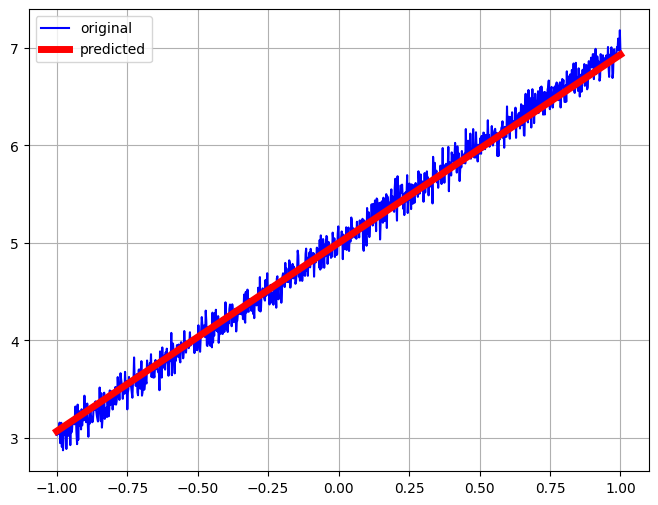

In [13]:
plt.tight_layout()
plt.plot(x, y, c='b', label='original')
plt.plot(x, y_hat, c='r', label='predicted', linewidth=5)
plt.legend()

# Animate (Linear Regression)
* **NOTE: animation code requires that ffmpeg to be installed!**

In [14]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [15]:
fig = plt.figure()
line = plt.plot([], c='r', label='predicted', linewidth=3)[0]

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

plt.plot(x, y, c='b', label='original', alpha=0.5)
plt.legend(loc='upper left')
plt.grid('on')


def animate_frame(frame):
    w0, w1, error = frame
    y_hat = w0 + w1*x
    
    line.set_data(x, y_hat)
    plt.title(f'MSE: {error:.4f}')
    

animation = FuncAnimation(fig, animate_frame, frames=history, interval=70)
video = animation.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Prediction new data

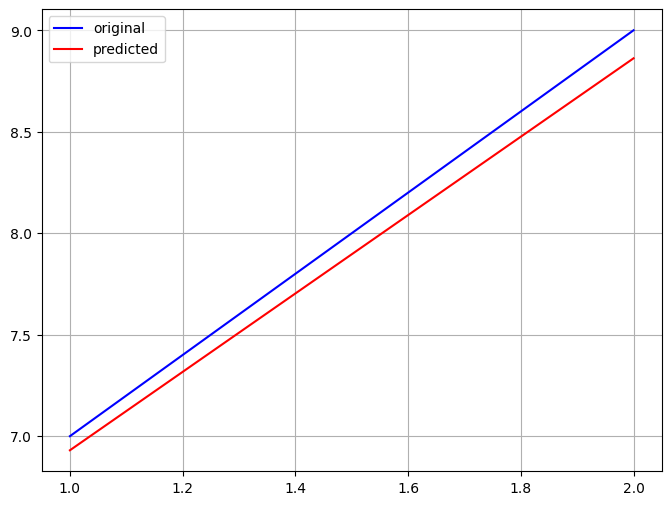

In [16]:
x_new_data = np.linspace(1, 2, dataset_size)

original = 2*x_new_data + 5
predicted = w0 + w1*x_new_data

plt.tight_layout()
plt.plot(x_new_data, original, c='b', label='original')
plt.plot(x_new_data, predicted, c='r', label='predicted')
plt.legend()

# Polynomial Regression

### Generate data with function:

* $y_{train} = -5 \ x_{train}^2 + x + 10 + \epsilon$
* where $\epsilon \sim \mathcal{N}(\mu,\,\sigma^{2})$

In [17]:
dataset_size = 1000
x = np.linspace(-1, 1, dataset_size)

# Generate noise to add some variation to the data
mu = 0
sigma = 0.1
epsilon = mu + sigma*np.random.randn(dataset_size)

y = -5*(x**2) + x + 10 + epsilon

In [18]:
x.shape, y.shape

((1000,), (1000,))

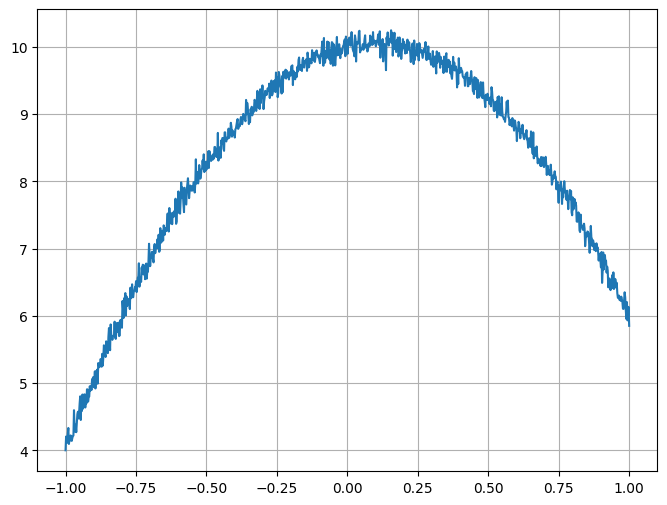

In [19]:
plt.tight_layout()
plt.plot(x, y)

### Model trainable parameters (randomly initialized)

In [20]:
w0 = np.random.randn()
w1 = np.random.randn()
w2 = np.random.randn()
w0, w1, w2

(0.8206044900312085, 0.07305127857379755, 0.3134310024516822)

### Training Loop

In [21]:
# Hyper parameters
num_epochs = 700
learning_rate = 0.02

history = []

for e in range(num_epochs):
    # forward
    y_hat = w0 + w1*x + w2*(x**2)
    
    error = mse(y_hat, y)
    
    if e % 20 == 0:
        print(f'Epoch: {e}, error: {error:.4f}')
    
    if e % 10 == 0:
        history.append((w0, w1, w2, error))
    
    # parameter update (backward)
    w0_grad = 2*np.mean(y_hat-y)
    w1_grad = 2*np.mean((y_hat-y)*x)
    w2_grad = 2*np.mean((y_hat-y)*(x**2))

    w0 -= learning_rate * w0_grad
    w1 -= learning_rate * w1_grad
    w2 -= learning_rate * w2_grad

Epoch: 0, error: 57.7238
Epoch: 20, error: 13.1254
Epoch: 40, error: 5.5060
Epoch: 60, error: 3.8619
Epoch: 80, error: 3.2311
Epoch: 100, error: 2.8112
Epoch: 120, error: 2.4661
Epoch: 140, error: 2.1680
Epoch: 160, error: 1.9075
Epoch: 180, error: 1.6791
Epoch: 200, error: 1.4785
Epoch: 220, error: 1.3023
Epoch: 240, error: 1.1473
Epoch: 260, error: 1.0109
Epoch: 280, error: 0.8910
Epoch: 300, error: 0.7854
Epoch: 320, error: 0.6925
Epoch: 340, error: 0.6107
Epoch: 360, error: 0.5388
Epoch: 380, error: 0.4754
Epoch: 400, error: 0.4197
Epoch: 420, error: 0.3706
Epoch: 440, error: 0.3274
Epoch: 460, error: 0.2894
Epoch: 480, error: 0.2559
Epoch: 500, error: 0.2265
Epoch: 520, error: 0.2005
Epoch: 540, error: 0.1777
Epoch: 560, error: 0.1576
Epoch: 580, error: 0.1399
Epoch: 600, error: 0.1243
Epoch: 620, error: 0.1106
Epoch: 640, error: 0.0986
Epoch: 660, error: 0.0880
Epoch: 680, error: 0.0786


### Compare the Generated Data with Gradient Descent Results
### Remember we had:
* $y_{train} = -5 \ x_{train}^2 + x + 10 + \epsilon$
* $w_0$ is 10
* $w_1$ is 1
* $w_2$ is -5

In [22]:
print(f'w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f}')

w0: 9.7073, w1: 0.9952, w2: -4.1775


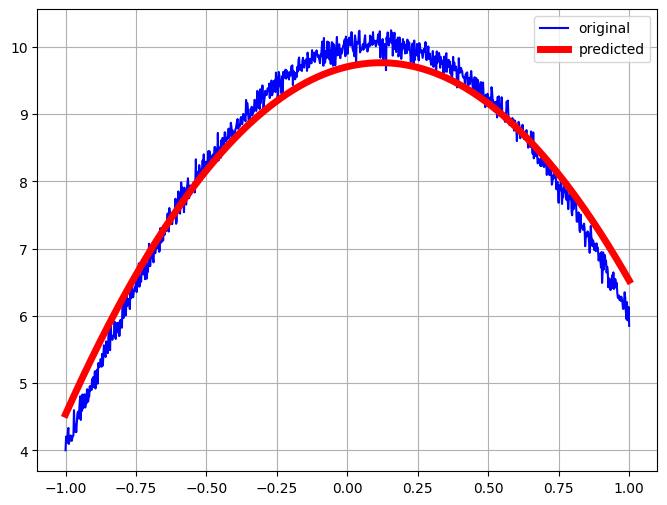

In [23]:
plt.tight_layout()
plt.plot(x, y, c='b', label='original')
plt.plot(x, y_hat, c='r', label='predicted', linewidth=5)
plt.legend()

# Animate (Polynomial Regression)

In [24]:
fig = plt.figure()
line = plt.plot([], c='r', label='predicted', linewidth=5)[0]

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

plt.plot(x, y, c='b', label='original', alpha=0.5)
plt.legend(loc='upper left')
plt.grid('on')


def animate_frame(frame):
    w0, w1, w2, error = frame
    y_hat = w0 + w1*x + w2*(x**2)
    
    line.set_data(x, y_hat)
    plt.title(f'MSE: {error:.4f}')
    

animation = FuncAnimation(fig, animate_frame, frames=history, interval=50)
video = animation.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Exploding Gradients Problem
* If gradient values are too high, it may destabilize the learning 
* Gradient values are so high, they can be NaN (not a number)
* Solution: Use gradient clipping to prevent extreme high and low gradient values

### Generate Data

In [25]:
dataset_size = 1000
x = np.linspace(0.1, 10, dataset_size)

# Generate noise to add some variation to the data
mu = 0
sigma = 0.1
epsilon = mu + sigma*np.random.randn(dataset_size)

y =  2*(x**3) - 2*(x**2) + epsilon

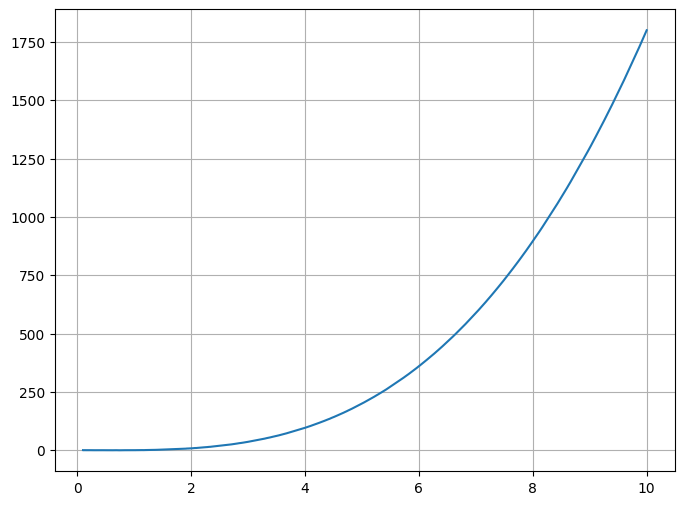

In [26]:
plt.tight_layout()
plt.plot(x, y)

### Model trainable parameters (randomly initialized)

In [27]:
w0 = np.random.randn()
w1 = np.random.randn()
w2 = np.random.randn()
w0, w1, w2

w0, w1, w2

(-1.033754416492084, 0.4593610504874174, 0.39100295242782285)

## Solution: Gradient Clipping
### Function for clipping gradients
* np.clip() make sures that gradient values are within range $[a_{min}, a_{max}]$
* If higher/lower than range $[a_{min}, a_{max}]$, set to $a_{min}$ or $a_{max}$

In [28]:
def clip_gradient(gradient):
    return np.clip(gradient, a_min=-1.5, a_max=1.5)

### Training Loop

In [29]:
# Hyper parameters
num_epochs = 1000
learning_rate = 0.02

history = []


for e in range(num_epochs):
    # forward
    y_hat = w0 + w1*(x**3) + w2*(x**2)

    error = mse(y_hat, y)

    ##### # parameter update (backward) inner ###########
    w0_grad = 2*np.mean(y_hat-y)
    w1_grad = 2*np.mean((y_hat-y)*(x**3))
    w2_grad = 2*np.mean((y_hat-y)*(x**2))
    
    # Original gradient descent
    #w0 -= learning_rate * w0_grad
    #w1 -= learning_rate * w1_grad
    #w2 -= learning_rate * w2_grad

    # Solution 1: gradient clipping
    w0 -= learning_rate * clip_gradient(w0_grad)
    w1 -= learning_rate * clip_gradient(w1_grad)
    w2 -= learning_rate * clip_gradient(w2_grad)
    #####################################################

    if e % 100 == 0:
        print(f'Epoch: {e}, error: {error:.4f}')

    if e % 100 == 0:
        history.append((w0, w1, w2, error))                

Epoch: 0, error: 231285.9496
Epoch: 100, error: 655.9840
Epoch: 200, error: 570.1489
Epoch: 300, error: 502.4692
Epoch: 400, error: 476.8881
Epoch: 500, error: 469.2515
Epoch: 600, error: 469.6742
Epoch: 700, error: 469.7945
Epoch: 800, error: 469.8112
Epoch: 900, error: 469.8134


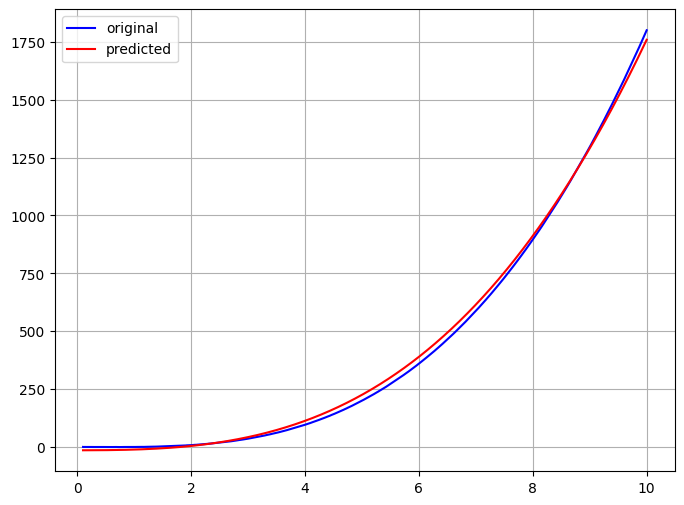

In [30]:
plt.tight_layout()
plt.plot(x, y, c='b', label='original')
plt.plot(x, y_hat, c='r', label='predicted')
plt.legend()

# Animate (Polynomial Regression with Gradient Clipping)

In [31]:
fig = plt.figure()
line = plt.plot([], c='r', label='predicted')[0]

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

plt.plot(x, y, c='b', label='original', alpha=0.5)
plt.legend(loc='upper left')
plt.grid('on')


def animate_frame(frame):
    w0, w1, w2, error = frame
    y_hat = w0 + w1*(x**3) + w2*(x**2)
    
    line.set_data(x, y_hat)
    plt.title(f'MSE: {error:.4f}')
    

animation = FuncAnimation(fig, animate_frame, frames=history, interval=50)
video = animation.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# See Also: Vanishing Gradients Problem
* Gradient values are almost zero, no update